In [1]:
import time 
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# INDICATORS
url = r"https://api.worldbank.org/v2/indicators?format=json"
response = requests.get(url)

response.status_code

200

In [ ]:
indicators_data = response.json()
indicators_data 


[{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323},
 [{'id': '1.0.HCount.1.90usd',
   'name': 'Poverty Headcount ($1.90 a day)',
   'unit': '',
   'source': {'id': '37', 'value': 'LAC Equity Lab'},
   'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
   'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
   'topics': [{'id': '11', 'value': 'Poverty '}]},
  {'id': '1.0.HCount.2.5usd',
   'name': 'Poverty Headcount ($2.50 a day)',
   'unit': '',
   'source': {'id': '37', 'value': 'LAC Equity Lab'},
   'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
   'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
   'topics': [{'id': '11', 'value': 'Poverty '}]},
  {'id': '1.0.HCount.Mid10to50',
   'name':

In [ ]:
indicators_data[0]  # ---> It's metadata of indicators

{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323}

In [ ]:
df = []
for i in range(1, 588):
    url = r"https://api.worldbank.org/v2/indicators?format=json&per_page=500&page={}".format(i)
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if len(data) < 2:
            print(f"No data found at page {i}")
            
        indicators = data[1]
        dfs = pd.DataFrame([{"id" : item["id"],
                       "name" : item["name"]} for item in indicators])
        df.append(dfs)

        print(f"Page{i} : {len(dfs)} indicators ccollected")
    
    else:
        print(f"Failed to fetch page {i}, status code {response.status_code}")


Page1 : 500 indicators ccollected
Page2 : 500 indicators ccollected
Page3 : 500 indicators ccollected
Page4 : 500 indicators ccollected
Page5 : 500 indicators ccollected
Page6 : 500 indicators ccollected
Page7 : 500 indicators ccollected
Page8 : 500 indicators ccollected
Page9 : 500 indicators ccollected
Page10 : 500 indicators ccollected
Page11 : 500 indicators ccollected
Page12 : 500 indicators ccollected
Page13 : 500 indicators ccollected
Page14 : 500 indicators ccollected
Page15 : 500 indicators ccollected
Page16 : 500 indicators ccollected
Page17 : 500 indicators ccollected
Page18 : 500 indicators ccollected
Page19 : 500 indicators ccollected
Page20 : 500 indicators ccollected
Page21 : 500 indicators ccollected
Page22 : 500 indicators ccollected
Page23 : 500 indicators ccollected
Page24 : 500 indicators ccollected
Page25 : 500 indicators ccollected
Page26 : 500 indicators ccollected
Page27 : 500 indicators ccollected
Page28 : 500 indicators ccollected
Page29 : 500 indicators ccoll

In [ ]:
df_ = pd.concat(df, ignore_index= True)

In [ ]:
df_.shape

(29323, 2)

In [ ]:
response = requests.get("https://api.worldbank.org/countries/USA/indicators/IT.CEL.SETS.P2?format=json")
response

<Response [200]>

In [ ]:
response.json()[0]

{'page': 1,
 'pages': 2,
 'per_page': 50,
 'total': 65,
 'sourceid': '2',
 'lastupdated': '2025-12-19'}

In [ ]:
import time 
import pandas as pd

base_url = r"https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"

category_df = {}
for category, indicator in indicator_groups.items():
    print(f"Fetching Information for the category {category}")
    All_category_df = []

    for indicator_code in indicator:
        print(f"Fetching Indicator {indicator_code}")
        page = 1

        while True:
            url = base_url.format(indicator_code, page)
            response = requests.get(url)

            if response.status_code != 200:
                print(f"No Data for Indicator {indicator_code} on page {page}")

            data = response.json()
            if len(data) < 2:
                print(f"Failed at page {page}")
                break

            total_pages = data[0]["pages"]
            record = data[1]

            df = pd.json_normalize(record)
            df = df[["country.id", "country.value", "indicator.id", "indicator.value", "date", 
                "value"]].rename(columns={
                    "country.id" : "country_id",
                    "country.value" : "country_value",
                    "indicator.id" : "indicator_id",
                    "indicator.value" : "indicator_name",
                    "date" : "year"
                })
            
            df = df[df["year"].astype("int") > 2015]
            All_category_df.append(df)

            if page >= total_pages:
                break
            else:
                page += 1
                time.sleep(0.3)

    if All_category_df:
        combined_df = pd.concat(All_category_df, ignore_index=True)
        category_df[category] = combined_df
        print(f"Total Rows collected for {category} : {len(combined_df)}")
    else:
        print(f"No Data Collected for {category}")

print("Data collection completed")




Fetching Information for the category economic_activity_growth
Fetching Indicator NY.GDP.MKTP.KD.ZG
Fetching Indicator NY.GDP.PCAP.CD
Total Rows collected for economic_activity_growth : 4788
Fetching Information for the category labour_market_indicators
Fetching Indicator SL.UEM.TOTL.ZS
Fetching Indicator SL.UEM.1524.ZS
Fetching Indicator SL.TLF.TOTL.IN
Total Rows collected for labour_market_indicators : 7182
Fetching Information for the category trade_globalization
Fetching Indicator NE.EXP.GNFS.CD
Fetching Indicator NE.IMP.GNFS.CD
Total Rows collected for trade_globalization : 4788
Fetching Information for the category poverty_inequality
Fetching Indicator SI.POV.NAHC
Fetching Indicator SI.POV.GINI


C:\Users\sohil\AppData\Local\Temp\ipykernel_20596\212079323.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(All_category_df, ignore_index=True)


Total Rows collected for poverty_inequality : 4788
Fetching Information for the category environmental_indicators
Fetching Indicator EG.FEC.RNEW.ZS
Fetching Indicator AG.LND.FRST.ZS
Total Rows collected for environmental_indicators : 4788
Fetching Information for the category health_indicators
Fetching Indicator SP.DYN.LE00.IN
Fetching Indicator SP.DYN.IMRT.IN
Fetching Indicator SH.H2O.BASW.ZS
Fetching Indicator SH.XPD.CHEX.GD.ZS
Fetching Indicator SH.IMM.IDPT
Fetching Indicator SH.IMM.MEAS
Fetching Indicator SH.MMR.RISK.ZS
Fetching Indicator SH.DTH.COMM.ZS
Fetching Indicator SH.TBS.INCD
Fetching Indicator SH.STA.BRTC.ZS
Fetching Indicator SH.STA.MMRT
Fetching Indicator SP.POP.65UP.TO.ZS
Fetching Indicator SH.HIV.INCD.ZS
Total Rows collected for health_indicators : 31122
Fetching Information for the category technology_indicators
Fetching Indicator IT.NET.USER.ZS
Fetching Indicator IT.CEL.SETS.P2
Total Rows collected for technology_indicators : 4788
Data collection completed


In [ ]:
#-------------------------- IMPORTING NECESSARIES LIBRARIES --------------------------
import time
import requests
import numpy as np
import pandas as pd


url = r"https://api.worldbank.org/countries?format=json&per_page=300"
response = requests.get(url)
data = response.json()
count = data[1]
countries = pd.DataFrame(count)


countries['region'] = countries['region'].apply(lambda x : x['value'])
countries['incomeLevel'] = countries['incomeLevel'].apply(lambda x : x['value'])
countries['lendingType'] = countries['lendingType'].apply(lambda x : x['value'])
countries.drop(columns="adminregion", inplace=True)
countries.drop(columns="capitalCity", inplace=True)
countries.rename(columns={"iso2Code" : "country_id"}, inplace= True)


indicator_groups = {
    "economic_activity_growth": [
        "NY.GDP.MKTP.KD.ZG",  # GDP growth (annual %)
        "NY.GDP.PCAP.CD"      # GDP per capita (current US$)
    ],

    "labour_market_indicators": [
        "SL.UEM.TOTL.ZS",     # Unemployment total
        "SL.UEM.1524.ZS",     # Unemployment youth total (ages 15–24)
        "SL.TLF.TOTL.IN"      # Labour force, total
    ],

    "trade_globalization": [
        "NE.EXP.GNFS.CD",     # Exports of goods and services (current US$)
        "NE.IMP.GNFS.CD"      # Imports of goods and services (current US$)
    ],

    "poverty_inequality": [
        "SI.POV.NAHC",        # Poverty headcount ratio at national poverty lines (% of population)
        "SI.POV.GINI"         # Gini index (measure of income inequality)
    ],

    "environmental_indicators": [
        "EG.FEC.RNEW.ZS",     # Renewable energy consumption (% of total final energy consumption)
        "AG.LND.FRST.ZS"      # Forest area (% of land area)
    ],

    "health_indicators": [
        "SP.DYN.LE00.IN",     # Life expectancy at birth
        "SP.DYN.IMRT.IN",     # Infant mortality rate
        "SH.H2O.BASW.ZS",     # Access to at least basic water services (% of population)
        "SH.XPD.CHEX.GD.ZS",  # Current health expenditure (% of GDP)
        "SH.IMM.IDPT",        # Immunization, DPT (% of children ages 12–23 months)
        "SH.IMM.MEAS",        # Immunization, measles (% of children ages 12–23 months)
        "SH.MMR.RISK.ZS",     # Risk of maternal death
        "SH.DTH.COMM.ZS",     # Deaths from communicable diseases (% of total)
        "SH.TBS.INCD",        # Tuberculosis incidence (per 100,000 people)
        "SH.STA.BRTC.ZS",     # Births attended by skilled health staff (%)
        "SH.STA.MMRT",        # Maternal mortality ratio (modeled estimate, per 100,000 live births)
        "SP.POP.65UP.TO.ZS",  # Population ages 65 and above (% of total population)
        "SH.HIV.INCD.ZS"      # HIV incidence rate (per 1,000 uninfected population ages 15–49)
    ],

   "technology_indicators": [
    "IT.NET.USER.ZS",   # Individuals using the Internet (% of population)
    "IT.CEL.SETS.P2"    # Mobile cellular subscriptions (per 100 people)
    ]
}



base_url = r"https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"
category_df = {}
for category, indicator in indicator_groups.items():
    print(f"Fetching Information for the category {category}")
    All_category_df = []

    for indicator_code in indicator:
        print(f"Fetching Indicator {indicator_code}")
        
        page = 1
        while True:
            url = base_url.format(indicator_code, page)
            response = requests.get(url)

            if response.status_code != 200:
                print(f"No Data for Indicator {indicator_code} on page {page}")
            data = response.json()
            if len(data) < 2:
                print(f"Failed at page {page}")
                break
            total_pages = data[0]["pages"]
            record = data[1]

            df = pd.json_normalize(record)
            df = df[["country.id", "country.value", "indicator.id", "indicator.value", "date", 
                "value"]].rename(columns={
                    "country.id" : "country_id",
                    "country.value" : "country_name",
                    "indicator.id" : "indicator_id",
                    "indicator.value" : "indicator_name",
                    "date" : "year"
                })

            df = df[df["year"].astype("int") > 2015]
            All_category_df.append(df)

            if page >= total_pages:
                break
            else:
                page += 1
                time.sleep(0.3)

    if All_category_df:
        combined_df = pd.concat(All_category_df, ignore_index=True)
        category_df[category] = combined_df
        print(f"Total Rows collected for {category} : {len(combined_df)}")
    else:
        print(f"No Data Collected for {category}")
print("Data collection completed")





economic_activity = category_df.get("economic_activity_growth", pd.DataFrame)
labour_market_indicators = category_df.get("labour_market_indicators", pd.DataFrame)
poverty_inequality = category_df.get("poverty_inequality", pd.DataFrame)
environmental_indicators = category_df.get("environmental_indicators", pd.DataFrame)
health_indicators = category_df.get("health_indicators", pd.DataFrame)
technology_indicators = category_df.get("technology_indicators", pd.DataFrame)
trade_globalization = category_df.get("trade_globalization", pd.DataFrame)


economic = pd.merge(economic_activity, countries, on= "country_id", how= "inner")
labour_market = pd.merge(labour_market_indicators, countries, on= "country_id", how= "inner")
trade = pd.merge(trade_globalization, countries, on= "country_id", how= "inner")
poverty = pd.merge(poverty_inequality, countries, on= "country_id", how= "inner")
health  = pd.merge(health_indicators, countries, on= "country_id", how= "inner")
technology  = pd.merge(technology_indicators, countries, on= "country_id", how= "inner")
environment  = pd.merge(environmental_indicators, countries, on= "country_id", how= "inner")


economic.drop(columns= ["indicator_id", "name", "id"], inplace= True)
trade.drop(columns= ["indicator_id", "name", "id"], inplace= True)
labour_market.drop(columns= ["indicator_id", "name", "id"], inplace= True)
poverty.drop(columns= ["indicator_id", "name", "id"], inplace= True)
health.drop(columns= ["indicator_id", "name", "id"], inplace= True)
technology.drop(columns= ["indicator_id", "name", "id"], inplace= True)
environment.drop(columns= ["indicator_id", "name", "id"], inplace= True)


economic.to_csv("economic.csv")
trade.to_csv("trade.csv")
labour_market.to_csv("labour_market.csv")
poverty.to_csv("poverty.csv")
health.to_csv("health.csv")
technology.to_csv("technology.csv")
environment.to_csv("environment.csv")

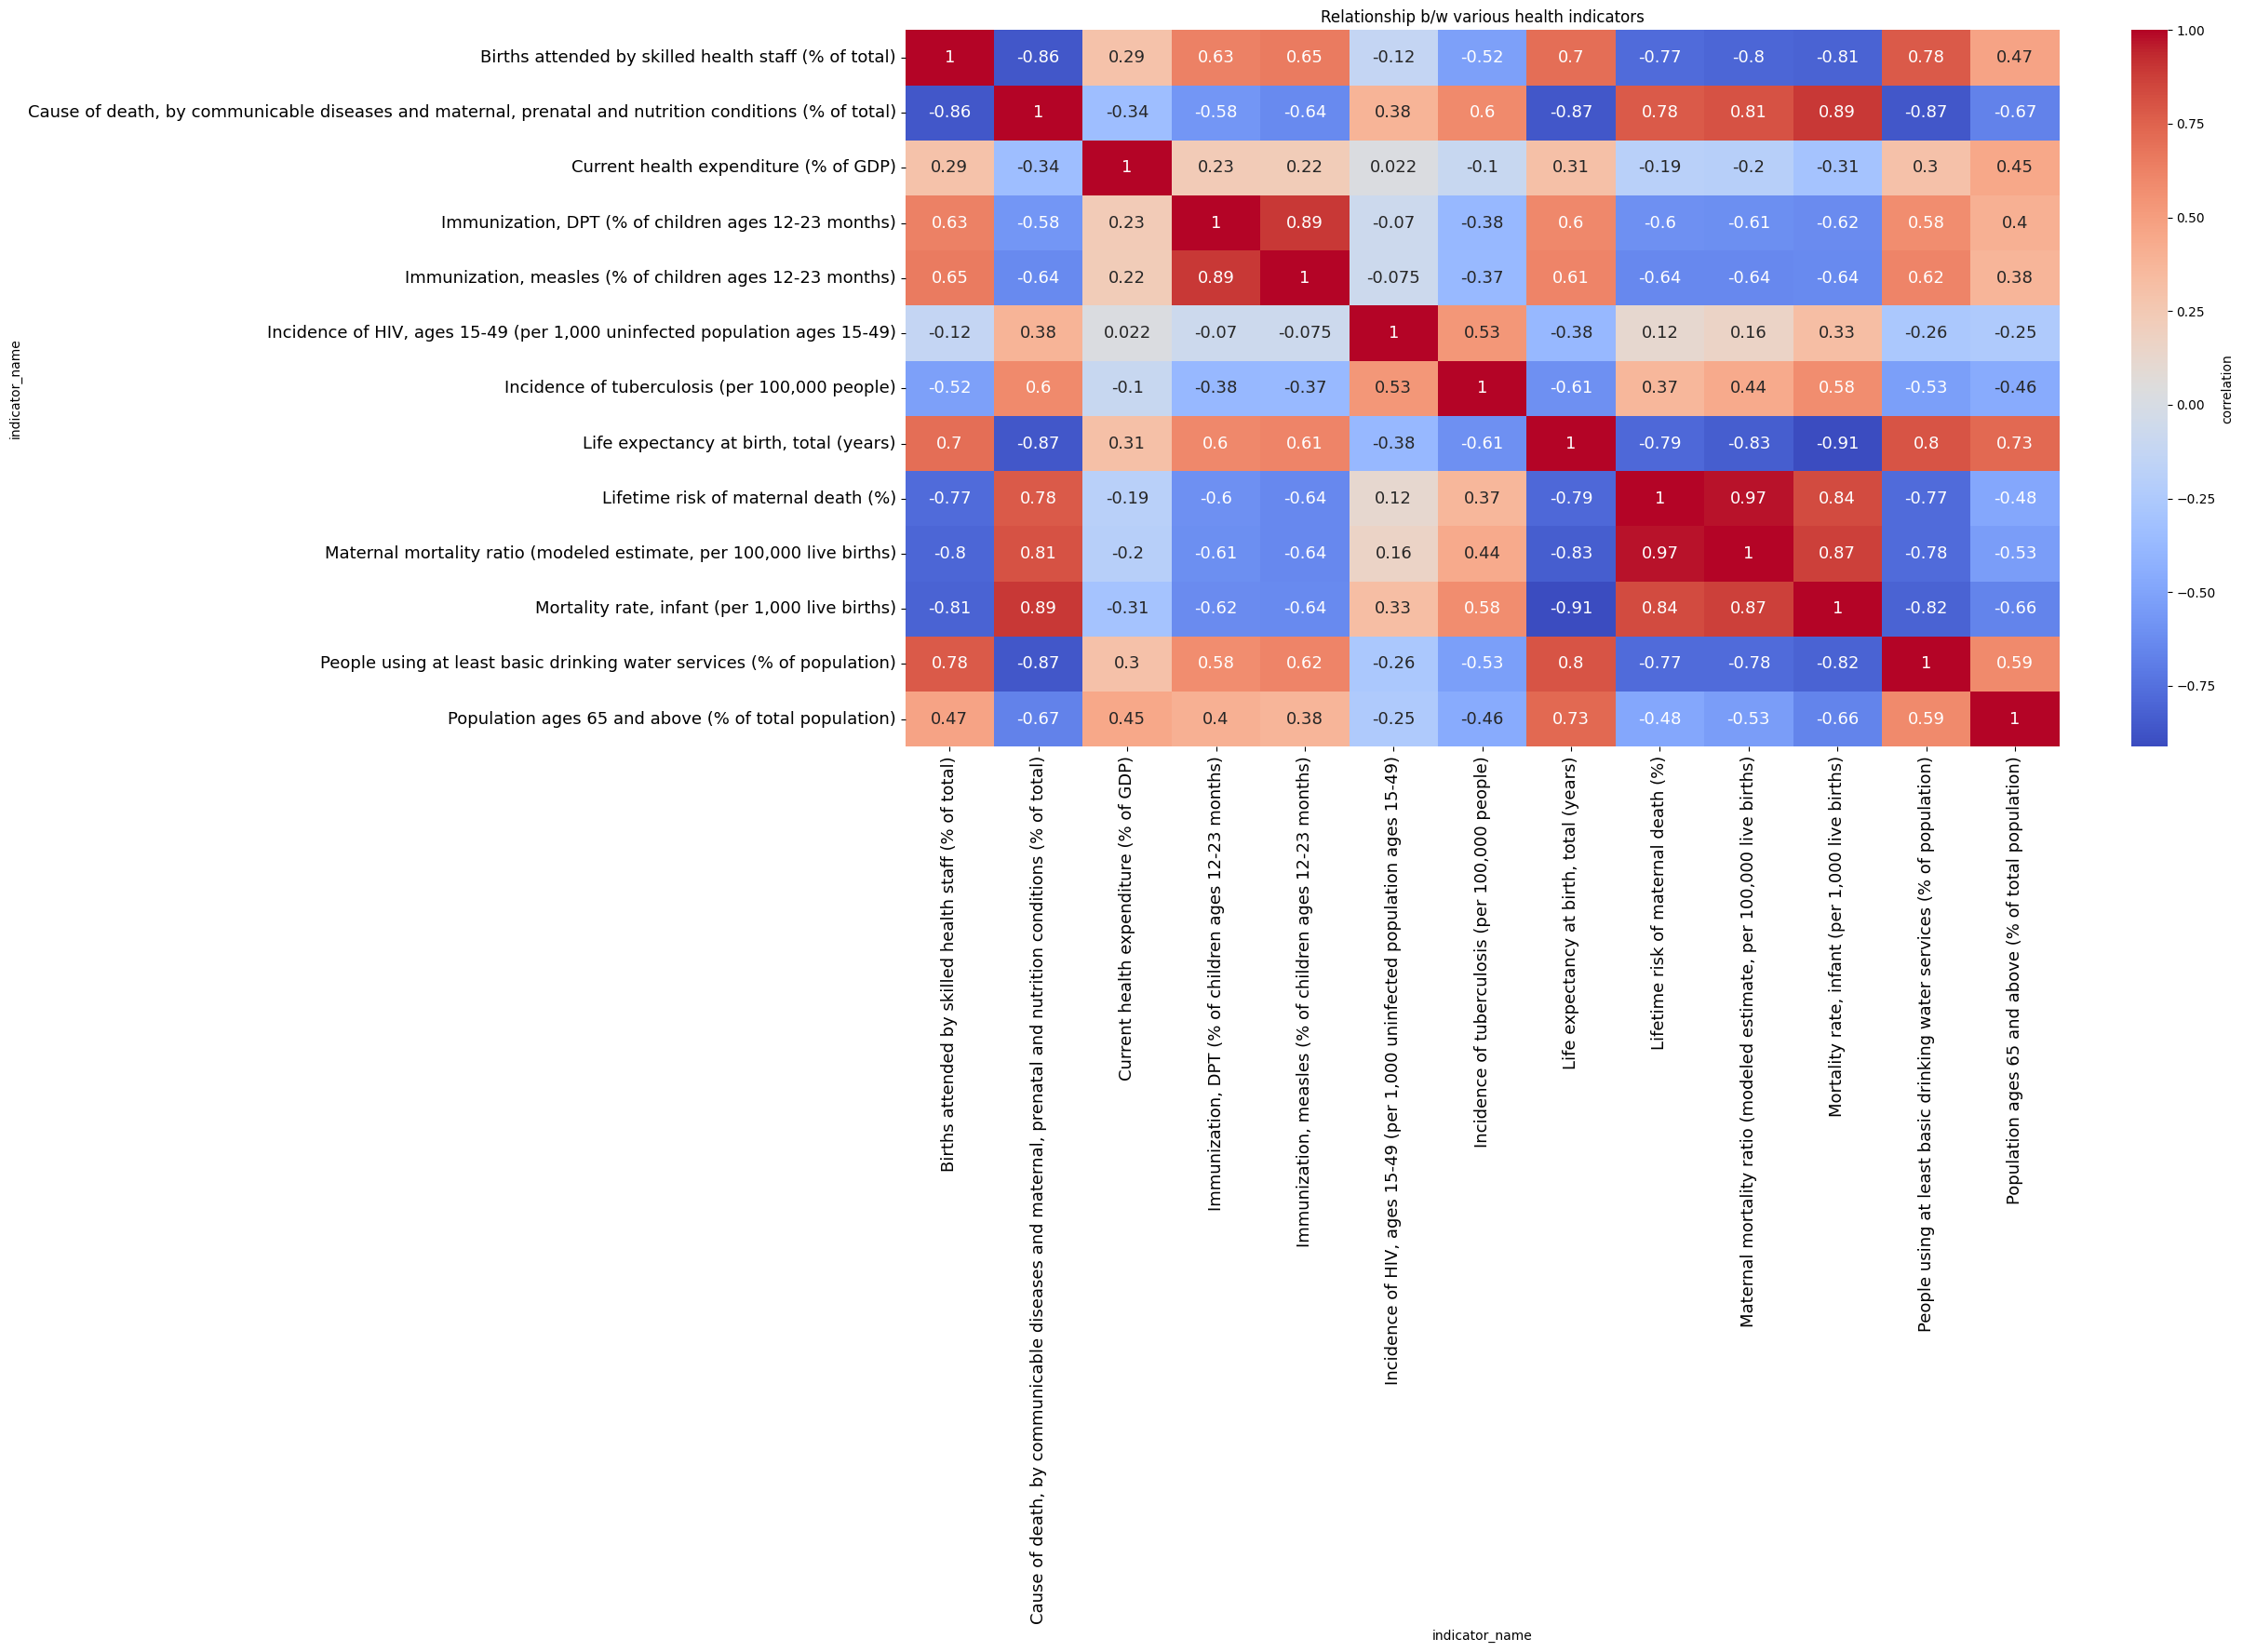

In [30]:
df_PowerBi = dfs['health'].pivot_table(index=["country_value", "year"],
                                columns= ["indicator_name"],
                                values="value")

corr = df_PowerBi.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (20,10))
ax= sns.heatmap(corr, annot= True, 
            cmap="coolwarm", 
            cbar_kws= {"label" : "correlation"},
            annot_kws= {"fontsize":13})

plt.title("Relationship b/w various health indicators")
ax.tick_params(axis="x", labelsize= 13)
ax.tick_params(axis="y", labelsize= 13)
plt.show()

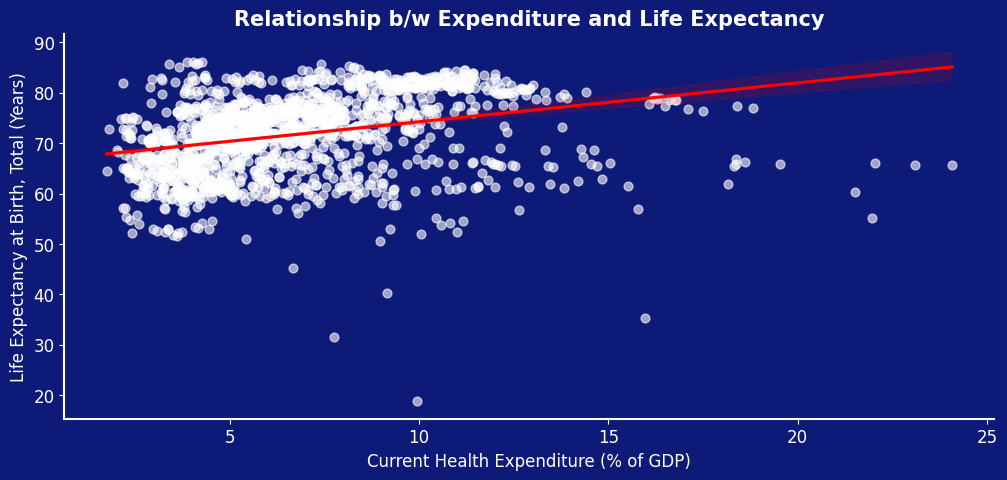

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pivot = health.pivot(index=["country_name", "year"], 
                               columns="indicator_name", 
                               values= "value")

plt.figure(figsize=(12,5), facecolor="#0E1A77")
ax= sns.regplot(data=df_pivot,
                x="Current health expenditure (% of GDP)",
                y="Life expectancy at birth, total (years)",
                scatter_kws= {"alpha":0.60, "s":40},
                line_kws= {"color":"red"}, color="white")

ax.patch.set_facecolor("#0E1A77")
ax.set_facecolor("#0E1A77")

ax.tick_params(axis="x", colors="white", labelsize=12)
ax.tick_params(axis="y", colors="white", labelsize=12)

ax.set_xlabel("Current Health Expenditure (% of GDP)", 
              color="white", 
              fontsize=12)
ax.set_ylabel("Life Expectancy at Birth, Total (Years)", 
              color="white", 
              fontsize=12)

ax.set_title("Relationship b/w Expenditure and Life Expectancy", 
             color="white", fontsize=15, 
             fontweight="semibold")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_color("#FFFFFF")
ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)


plt.show()

In [4]:
import os
import pyodbc
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
# LOAD ALL THE FILES INTO DATABASE

database = "WORLD_BANK_API"
server = r"SOHILKHAN\SQLEXPRESS"
driver = "ODBC Driver 18 for SQL Server"

folder_path = r"C:\Users\sohil\OneDrive\Desktop\Data\API Integration Project"
engine = create_engine(f"mssql+pyodbc://@{server}/{database}?driver=ODBC Driver 18 for SQL Server&trusted_connection=yes&TrustServerCertificate=yes")


for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file)
        table_name = os.path.splitext(file)[0].upper()

        df = pd.read_csv(file_path)
        df.to_sql(name= table_name, con= engine, 
                index= False, if_exists="append")
            
print("All Files Successfully Loaded Into the Database")


All Files Successfully Loaded Into the Database
